In [260]:
#Ignorar os erros
import warnings
warnings.filterwarnings('ignore')
#pandas
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib as mpl
import locale
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter

IMPORTANDO OS DATASET EM CSV, TRANSFORMAR EM DATAFRAME E CONCATENAR
PARA SER APENAS UM DATAFRAME.

# PRÉ PROCESSAMENTO DOS DADOS 

In [ ]:
#importando o dataset

#Dataset 01 ao 26/01/2024
df_pacotes_entregues_1 = pd.read_csv('./bronze/fev_01_15.csv',delimiter=';')

#Dataset 27 ao 31/01/2024
df_pacotes_entregues_2 = pd.read_csv('./bronze/fev_16_29.csv',delimiter=';')

#Concatemando os dataframe

df_pacotes_entregues = pd.concat([df_pacotes_entregues_1,df_pacotes_entregues_2])
#Exibindo o dataframe

#df_pacotes_entregues.head(2)

In [ ]:
#Modificando o nome das colunas 

df_pacotes_entregues.rename(columns={'id_pedido':'ID_PEDIDO',
                                    'transportado':'TRANSPORTADORA',
                                     'motorista':'MOTORISTA',
                                     'Mercadoria':'VALOR_ENCOMENDA',
                                     'CEP _:'CEP',
                                     'assinatura':'ENTREGUE',
                                     'Endereço completo':'ENDERECO_COMPLETO',
                                     'Cidade Destino':'CIDADE',
                                     'Distrito ':'BAIRRO',
                                     'Destinatário':'CLIENTE',
                                     'Horário da entrega':'DATA_ENTREGA',
                                     ' entrega':'GALPAO_ENTREGA',
                                     'Peso ':'PESO_PRODUTO',
                                     'CNPJ':'CPF_CNPJ',
                                     'Origem':'ORIGEM',
                                     'Estado Remetente':'ESTADO ORIGEM',
                                     'Cidade de Origem':'CIDADE ORIGEM'}, inplace=True)

#Excluído coluna 

df_pacotes_entregues.drop(['Tipo de Produto','ORIGEM'],axis=1,inplace=True)

#Exibindo o dataframe
df_pacotes_entregues.head(1)

Observando a dimensão do dataframe utilizando .shape
Essa função retorna o numero de linhas e o numero de colunas
(linhas, colunas)

In [222]:
#Verificando a dimensão

df_pacotes_entregues.shape

(609837, 16)

A função dataframe.isnull() retorna se existe valores nulos,
mas o retorno é em forma boleana ( False or True). Então utilizei também
.sum(), dessa forma a saída é em forma de numero.


In [223]:
#Verificando os nulos
df_pacotes_entregues.isnull().sum()

ID_PEDIDO             0
TRANSPORTADORA        0
GALPAO_ENTREGA        0
MOTORISTA             0
ENTREGUE              0
VALOR_ENCOMENDA       0
CEP                   0
ENDERECO_COMPLETO     0
CIDADE                0
BAIRRO               40
CLIENTE               0
DATA_ENTREGA          0
CPF_CNPJ              0
PESO_PRODUTO          0
ESTADO ORIGEM         0
CIDADE ORIGEM         0
dtype: int64

O dataframe possui 40 valores nulos no atributos Bairro e 39 no atributos
origem. Como conheço o dataset, irei tratar os missings do atributo Bairro com o valor
"BAIRRO INEXISTENTE" e os missings do atributo origem, com o mesmo nomes que possui no 
atributo 'CIDADE ORIGEM'

Abaixo especifiquei o atribuido que desejo modificar
a função .fillna() substitui os valor nulos na string ('BAIRRO INEXISTENTE')
e dentro da função, utilizei inplace-True, para salvar a alteração.

In [224]:
#Modificando os missings em 'BAIRRO INEXISTENTE'
df_pacotes_entregues['BAIRRO'].fillna('BAIRRO INEXISTENTE',inplace=True)

Para ter uma melhor consulta e melhorar os dados,
irei modificar toda as string para que elas estejam em letras maiusculas com o .upper()
o .str(), foi utilizado antes para especificar que é uma string.

In [ ]:
#modificando as string para maiusculas

df_pacotes_entregues['MOTORISTA'] = df_pacotes_entregues['MOTORISTA'].str.upper()

df_pacotes_entregues['CIDADE'] = df_pacotes_entregues['CIDADE'].str.upper()

df_pacotes_entregues['BAIRRO'] = df_pacotes_entregues['BAIRRO'].str.upper()

df_pacotes_entregues['CLIENTE'] = df_pacotes_entregues['CLIENTE'].str.upper()

df_pacotes_entregues['ENTREGUE'] = df_pacotes_entregues['ENTREGUE'].str.upper()

df_pacotes_entregues['ENDERECO_COMPLETO'] = df_pacotes_entregues['ENDERECO_COMPLETO'].str.upper()

df_pacotes_entregues['GALPAO_ENTREGA'] = df_pacotes_entregues['GALPAO_ENTREGA'].str.upper()

#df_pacotes_entregues['ORIGEM'] = df_pacotes_entregues['ORIGEM'].str.upper()

df_pacotes_entregues['ESTADO ORIGEM'] = df_pacotes_entregues['ESTADO ORIGEM'].str.upper()

df_pacotes_entregues['CIDADE ORIGEM'] = df_pacotes_entregues['CIDADE ORIGEM'].str.upper()


#Exibindo o dataframe

#df_pacotes_entregues.head(2)

In [226]:
#exibindo as informações dos tipos dos atributos
df_pacotes_entregues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609837 entries, 0 to 287439
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID_PEDIDO          609837 non-null  int64 
 1   TRANSPORTADORA     609837 non-null  object
 2   GALPAO_ENTREGA     609837 non-null  object
 3   MOTORISTA          609837 non-null  object
 4   ENTREGUE           609837 non-null  object
 5   VALOR_ENCOMENDA    609837 non-null  object
 6   CEP                609837 non-null  int64 
 7   ENDERECO_COMPLETO  609837 non-null  object
 8   CIDADE             609837 non-null  object
 9   BAIRRO             609837 non-null  object
 10  CLIENTE            609837 non-null  object
 11  DATA_ENTREGA       609837 non-null  object
 12  CPF_CNPJ           609837 non-null  int64 
 13  PESO_PRODUTO       609837 non-null  object
 14  ESTADO ORIGEM      609837 non-null  object
 15  CIDADE ORIGEM      609837 non-null  object
dtypes: int64(3), object(

In [227]:
#Modificando o tipo do atributo para int

df_pacotes_entregues['CPF_CNPJ'] = df_pacotes_entregues['CPF_CNPJ'].astype(int)

#exibindo
#df_pacotes_entregues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609837 entries, 0 to 287439
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID_PEDIDO          609837 non-null  int64 
 1   TRANSPORTADORA     609837 non-null  object
 2   GALPAO_ENTREGA     609837 non-null  object
 3   MOTORISTA          609837 non-null  object
 4   ENTREGUE           609837 non-null  object
 5   VALOR_ENCOMENDA    609837 non-null  object
 6   CEP                609837 non-null  int64 
 7   ENDERECO_COMPLETO  609837 non-null  object
 8   CIDADE             609837 non-null  object
 9   BAIRRO             609837 non-null  object
 10  CLIENTE            609837 non-null  object
 11  DATA_ENTREGA       609837 non-null  object
 12  CPF_CNPJ           609837 non-null  int32 
 13  PESO_PRODUTO       609837 non-null  object
 14  ESTADO ORIGEM      609837 non-null  object
 15  CIDADE ORIGEM      609837 non-null  object
dtypes: int32(1), int64(2

Substituir a virgula por ponto, assim consigo converter o atributo para float

In [ ]:
#modifica a virgula por ponto

df_pacotes_entregues['VALOR_ENCOMENDA'] = df_pacotes_entregues['VALOR_ENCOMENDA'].str.replace(',','.')

df_pacotes_entregues['PESO_PRODUTO'] = df_pacotes_entregues['PESO_PRODUTO'].str.replace(',','.')

#Exibindo
#df_pacotes_entregues.head(2)

In [230]:
#transformando o atributo em float utilizando a função .astype()

df_pacotes_entregues['VALOR_ENCOMENDA'] = df_pacotes_entregues['VALOR_ENCOMENDA'].astype(float)

df_pacotes_entregues['PESO_PRODUTO'] = df_pacotes_entregues['PESO_PRODUTO'].astype(float)

#exibindo as info do dataframe
#df_pacotes_entregues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609837 entries, 0 to 287439
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID_PEDIDO          609837 non-null  int64  
 1   TRANSPORTADORA     609837 non-null  object 
 2   GALPAO_ENTREGA     609837 non-null  object 
 3   MOTORISTA          609837 non-null  object 
 4   ENTREGUE           609837 non-null  object 
 5   VALOR_ENCOMENDA    609837 non-null  float64
 6   CEP                609837 non-null  int64  
 7   ENDERECO_COMPLETO  609837 non-null  object 
 8   CIDADE             609837 non-null  object 
 9   BAIRRO             609837 non-null  object 
 10  CLIENTE            609837 non-null  object 
 11  DATA_ENTREGA       609837 non-null  object 
 12  CPF_CNPJ           609837 non-null  int32  
 13  PESO_PRODUTO       609837 non-null  float64
 14  ESTADO ORIGEM      609837 non-null  object 
 15  CIDADE ORIGEM      609837 non-null  object 
dtypes:

In [231]:
#transformando no tipo datetime
df_pacotes_entregues['DATA_ENTREGA'] = pd.to_datetime(df_pacotes_entregues['DATA_ENTREGA'])

#Extrair somente a data
df_pacotes_entregues['DATA_ENTREGA'] = df_pacotes_entregues['DATA_ENTREGA'].dt.date

#exibindo o dataframe
df_pacotes_entregues['DATA_ENTREGA'].head()


0    2024-02-15
1    2024-02-15
2    2024-02-15
3    2024-02-15
4    2024-02-15
Name: DATA_ENTREGA, dtype: object

In [232]:
#Transformando novamente para datetime, porque quando extrai somente a data
# o atributo é convertido para string(object)

df_pacotes_entregues['DATA_ENTREGA'] = pd.to_datetime(df_pacotes_entregues['DATA_ENTREGA'])

df_pacotes_entregues['DATA_ENTREGA'].head()

0   2024-02-15
1   2024-02-15
2   2024-02-15
3   2024-02-15
4   2024-02-15
Name: DATA_ENTREGA, dtype: datetime64[ns]

In [233]:
#exibindo os valores nulos
df_pacotes_entregues.dtypes

ID_PEDIDO                     int64
TRANSPORTADORA               object
GALPAO_ENTREGA               object
MOTORISTA                    object
ENTREGUE                     object
VALOR_ENCOMENDA             float64
CEP                           int64
ENDERECO_COMPLETO            object
CIDADE                       object
BAIRRO                       object
CLIENTE                      object
DATA_ENTREGA         datetime64[ns]
CPF_CNPJ                      int32
PESO_PRODUTO                float64
ESTADO ORIGEM                object
CIDADE ORIGEM                object
dtype: object

In [236]:
#Verificando a dimensão do dataframe
df_pacotes_entregues.shape

(609837, 16)

In [237]:
#Exportando os dataframe para csv e salvando na camado Silver
#Camado onde possuo os dados limpos e tambem onde posso iniciar alguma analise

df_pacotes_entregues.to_csv('./silver/entregas_fevereiro.csv',encoding='utf-8', index=False)

# exportando os pacotes não entregue

#df_pacotes_nao_entregues.to_csv('./pacotes_nao_entregue_16_31012024_processado.csv',encoding='utf-8', index=False)

# ANALISE EXPLORATÓRIA DOS DADOS

In [238]:
#Clonando um dataframe original
df_pacotes_stemporal = df_pacotes_entregues

#Setando a data como index para criar grafico de linha como serie temporal

df_pacotes_stemporal.set_index('DATA_ENTREGA', inplace=True)

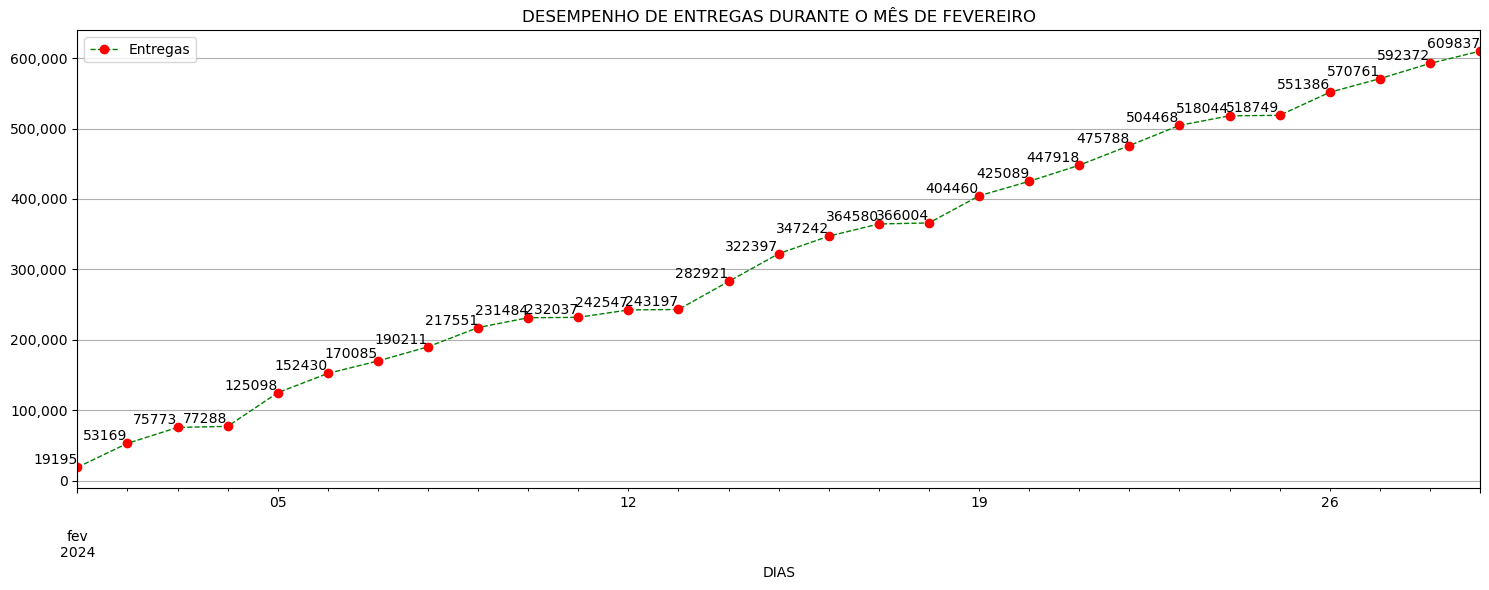

In [335]:

#Função .cumsum() faz a contagem com os valores acumulados, dia a dia
# A função .resample('D') utiliza a metrica de dias
#.plot() plota o grafico com as especificações:
#Kind='line' - Plota grafico de linhas
#label='' , especifica o nome da linha
#marker='' Criar pontos a cada marcação
#figsize = especifica o tamanho do grafico

df_entregas_line = df_pacotes_stemporal['ID_PEDIDO'].resample('D').count().cumsum()

df_entregas_line.plot(kind='line',
                      label='Entregas',
                      marker='o',
                      color='green',
                      linewidth='1',
                      linestyle='--',
                      mfc='red',
                      mec='red',figsize=(15,6))

#Adicionando rotulo aos valores
for x, y in df_entregas_line.items():
    plt.text(x,y + 10,f'{y}',ha='right',va='bottom')
    
# Adicionando rótulo aos valores com separadores de milhares no eixo y
    
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
    
#Ajustando os ticks do eixo X

#plt.xticks(range(len(df_entregas_line)), df_entregas_line.index)
                                
plt.title('DESEMPENHO DE ENTREGAS DURANTE O MÊS DE FEVEREIRO')
plt.xlabel('DIAS')
#plt.ylabel('QUANTIDADES DE ENCOMENDAS')
plt.legend()

# Definindo o formato dos números nos eixos y com apenas duas casas decimais
#ax.ticklabel_format(style='plain', axis='y', useOffset=False)
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '%1.2f' % x))

#plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.1f}'.format(x)))

#Exibir as linhas de grade
plt.grid()

#Reduzir a margem 
plt.tight_layout()

#Salva o gráfico
plt.savefig("./gold/total_entrega_1.svg")
#plt.savefig("base_pacotes.pdf")
plt.savefig("./gold/total_entrega_1.png",dpi = 150, format = "png")

plt.show()

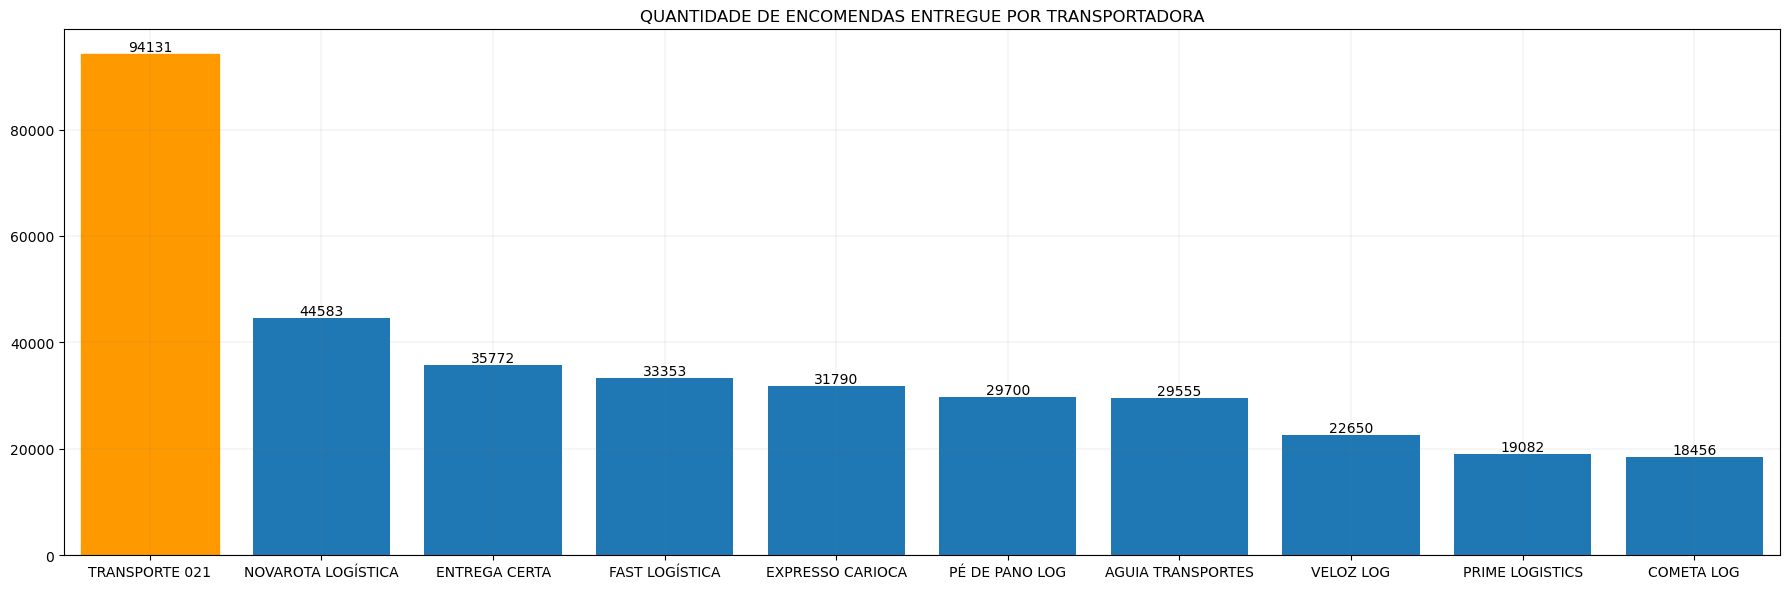

In [336]:
#Contagem dos pacotes por galpao, limitando apenas 10
df_galpao = df_pacotes_entregues['GALPAO_ENTREGA'].value_counts(ascending=False).head(10)

#modificando as linhas

#plotar graficos
#Função pyplot.bar()

# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(18,6))

# plota o gráfico de barras
df_galpao.plot(kind='bar', legend=False)

#Definindo o titulo do grafico
plt.title('QUANTIDADE DE ENCOMENDAS ENTREGUE POR TRANSPORTADORA')

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0], fmt='%.0f')

#Identifica as barras dentro do grafico
b2 = ax.bar(x = df_galpao.index, height = df_galpao)

# Demarcar a 
b2[0].set_color("#ff9900")

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

#Exibindo as linhas de grade 
ax.grid(True, linestyle='-', linewidth=0.1, color='gray')

#Salva o gráfico
plt.savefig("./gold/transportadora_02.svg")
#plt.savefig("base_pacotes.pdf")
plt.savefig("./gold/transportadora_02.png",dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

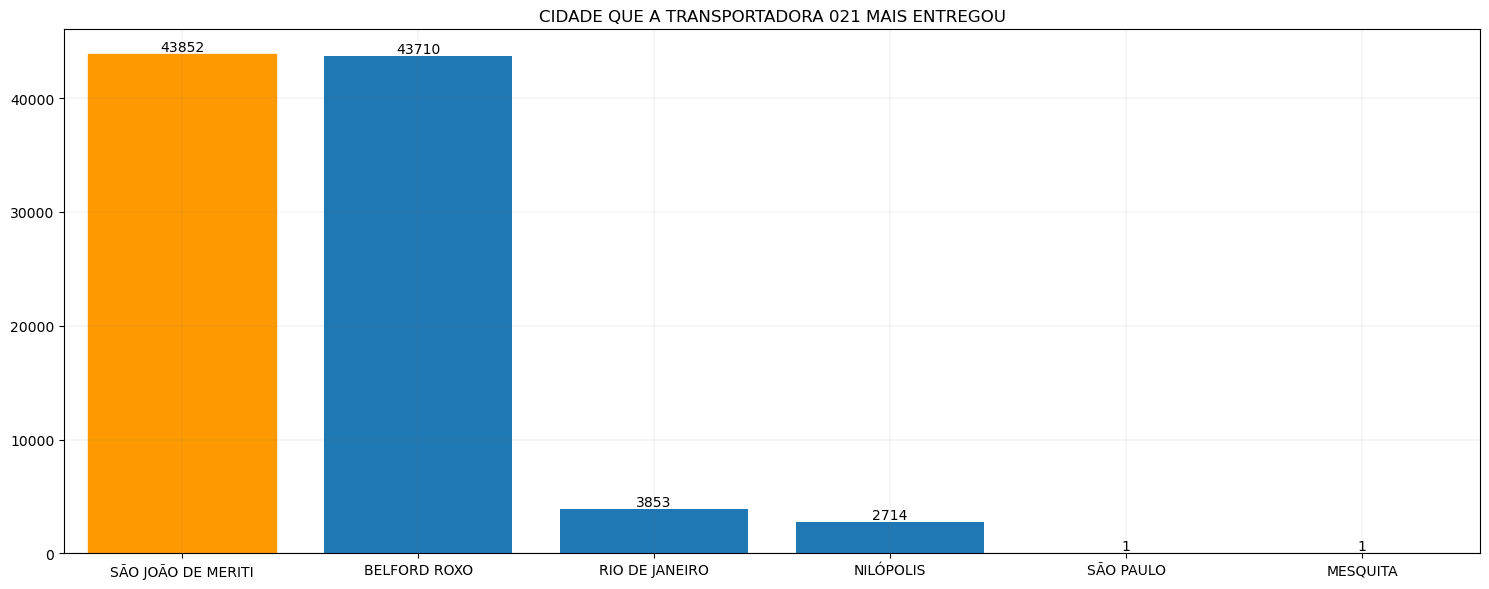

In [337]:
# Filtrando as 10 cidades que mais houve entrega de encomendas

df_filtro_galpao_cidade = df_pacotes_entregues[df_pacotes_entregues['GALPAO_ENTREGA'] == 'TRANSPORTE 021']

#Plotando o grafico

df_cidade_galpao_top_10 = df_filtro_galpao_cidade['CIDADE'].value_counts().head(10)

#Função pyplot.bar()
# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(15,6))

# plota o gráfico de barras
df_cidade_galpao_top_10.plot(kind='bar', legend=False, width=0.5, ax=ax)
plt.title('CIDADE QUE A TRANSPORTADORA 021 MAIS ENTREGOU')
#plt.xlabel("quantidades de pacotes")
#plt.ylabel("Nome dos Hub's")

# Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0])

b2 = ax.bar(x = df_cidade_galpao_top_10.index, height = df_cidade_galpao_top_10)

b2[0].set_color("#ff9900")

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

#Exibindo as linhas de grade 
ax.grid(True, linestyle='-', linewidth=0.1, color='gray')

#Salva o gráfico
plt.savefig("./gold/cidade_top_10_pacotes_03.svg")
#plt.savefig("base_pacotes.pdf")
plt.savefig("./gold/cidade_top_10_pacotes_03.png",dpi = 150, format = "png")

# Exibe o gráfico
plt.show()


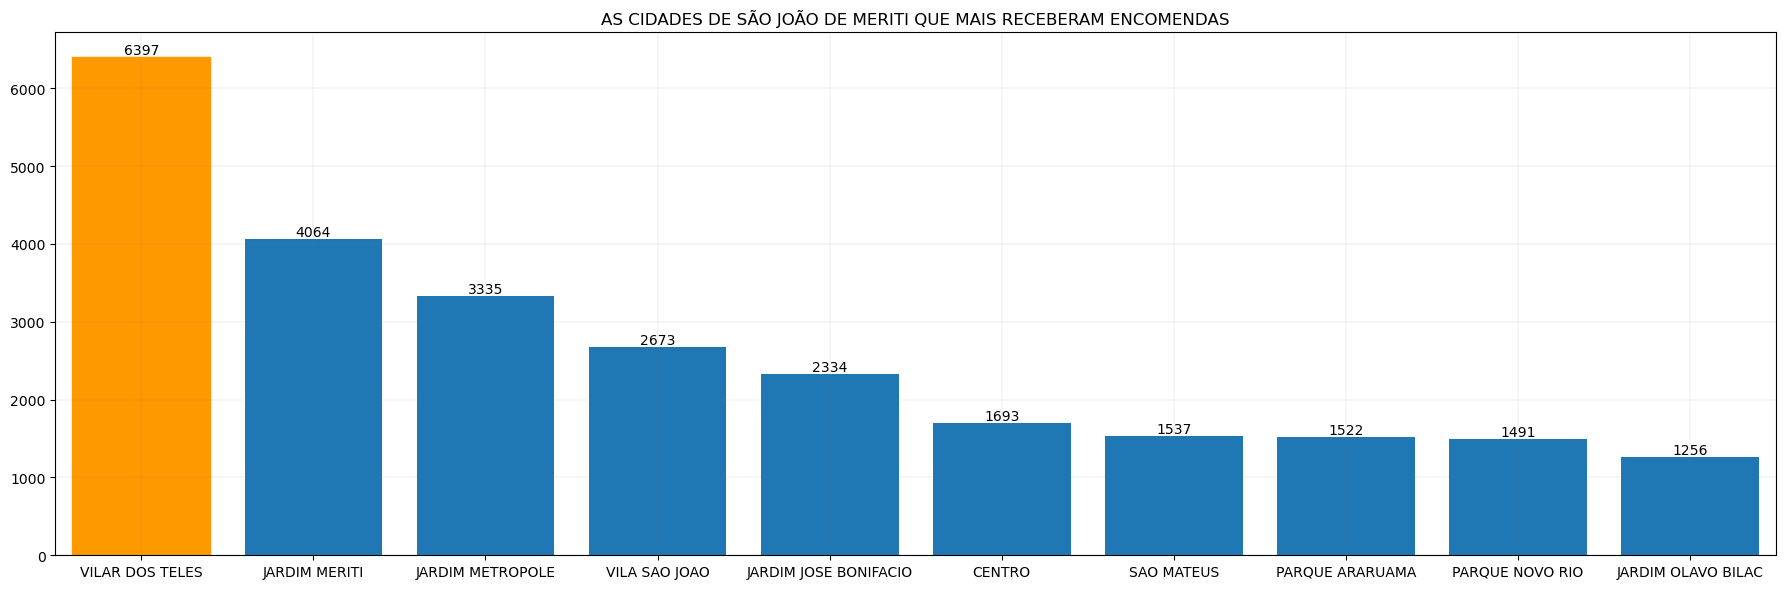

In [338]:
# OS 5 BAIRROS QUE MAIS RECEBEREM ENCOMENDAS

#Filtando para obter somente o dataframe que contém a cidade ' São João de meriti'
df_cidade_sjm = df_filtro_galpao_cidade[df_filtro_galpao_cidade['CIDADE'] == 'SÃO JOÃO DE MERITI']

#Filtrando por cidade
df_bairro_sjm = df_cidade_sjm['BAIRRO'].value_counts().head(10)

# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(18,6))

# plota o gráfico de barras
df_bairro_sjm.plot(kind='bar', legend=False)

#Adicionando titulo ao grafico
plt.title('AS CIDADES DE SÃO JOÃO DE MERITI QUE MAIS RECEBERAM ENCOMENDAS')
#plt.xlabel("BAIRROS")
#plt.ylabel("Nome dos Hub's")

# Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0])

#mapear as barra no grafico
b2 = ax.bar(x = df_bairro_sjm.index, height = df_bairro_sjm)

#Colorir a primeira barra do grafico
b2[0].set_color("#ff9900")

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Plotando as linhas de grade com cores cinzas

ax.grid(True, linestyle='-', linewidth=0.1, color='gray')

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

#Salva o gráfico
plt.savefig("./gold/cidade_pacotes_sjm_03.svg")
plt.savefig("./gold/cidade_pacotes_sjm_03.png",dpi = 150, format = "png")


# Exibe o gráfico
plt.show()

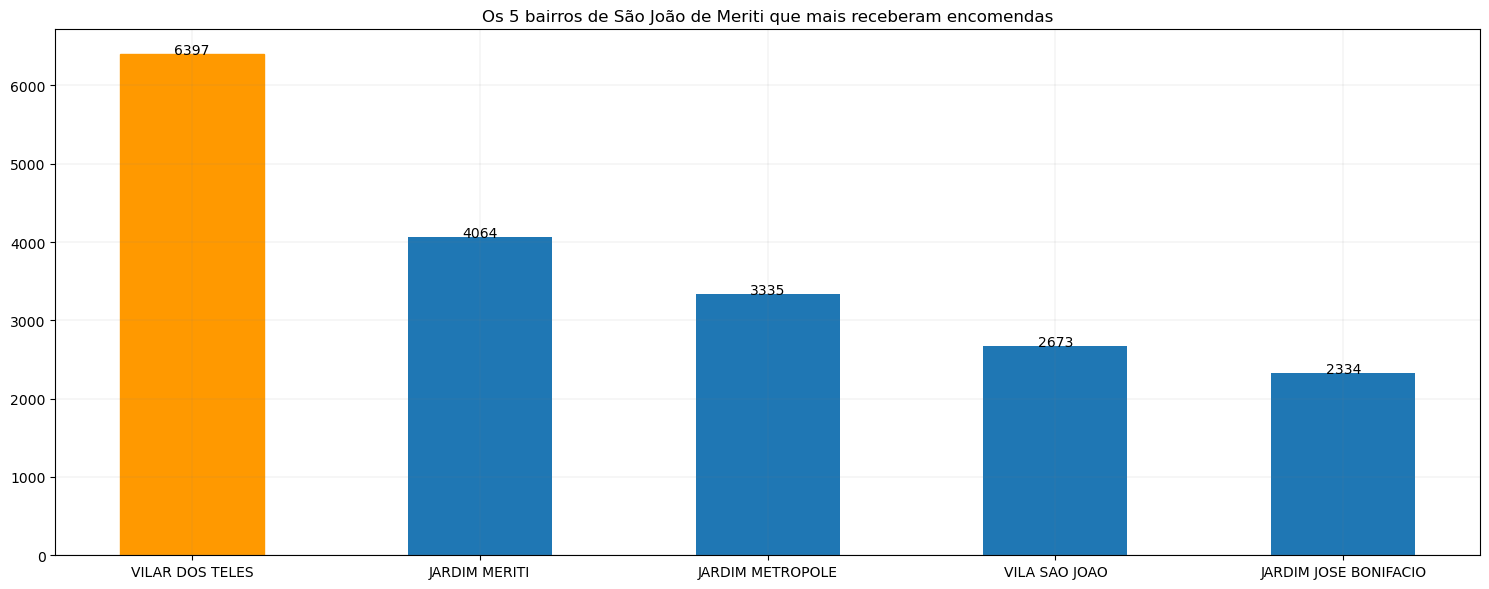

In [339]:

# Filtando para obter somente o dataframe que contém a cidade 'São João de Meriti'
df_cidade_sjm = df_filtro_galpao_cidade[df_filtro_galpao_cidade['CIDADE'] == 'SÃO JOÃO DE MERITI']

# Filtrando por bairro
df_bairro_sjm = df_cidade_sjm['BAIRRO'].value_counts().head(5)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(15, 6))

# Ajustando a largura das barras
largura_barra = 0.5  # Ajuste a largura conforme necessário

# Plota o gráfico de barras com a largura ajustada
b1 = ax.bar(df_bairro_sjm.index, df_bairro_sjm, width=largura_barra)

#Demarcando a primeira barra do grafico para evidenciar.
b1[0].set_color("#ff9900")

# Adicionando título ao gráfico
plt.title('Os 5 bairros de São João de Meriti que mais receberam encomendas')

# Acrescenta os valores sobre as barras
for i, v in enumerate(df_bairro_sjm):
    ax.text(i, v + 0.1, str(v), ha='center')
    

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Plotando as linhas de grade com cores cinzas
ax.grid(True, linestyle='-', linewidth=0.1, color='gray')

# Salvando o gráfico
plt.savefig("./gold/bairro_pacotes_sjm_04.svg")
plt.savefig("./gold/bairro_pacotes_sjm_04.png",dpi = 150, format = "png")


# Exibindo o gráfico
plt.show()


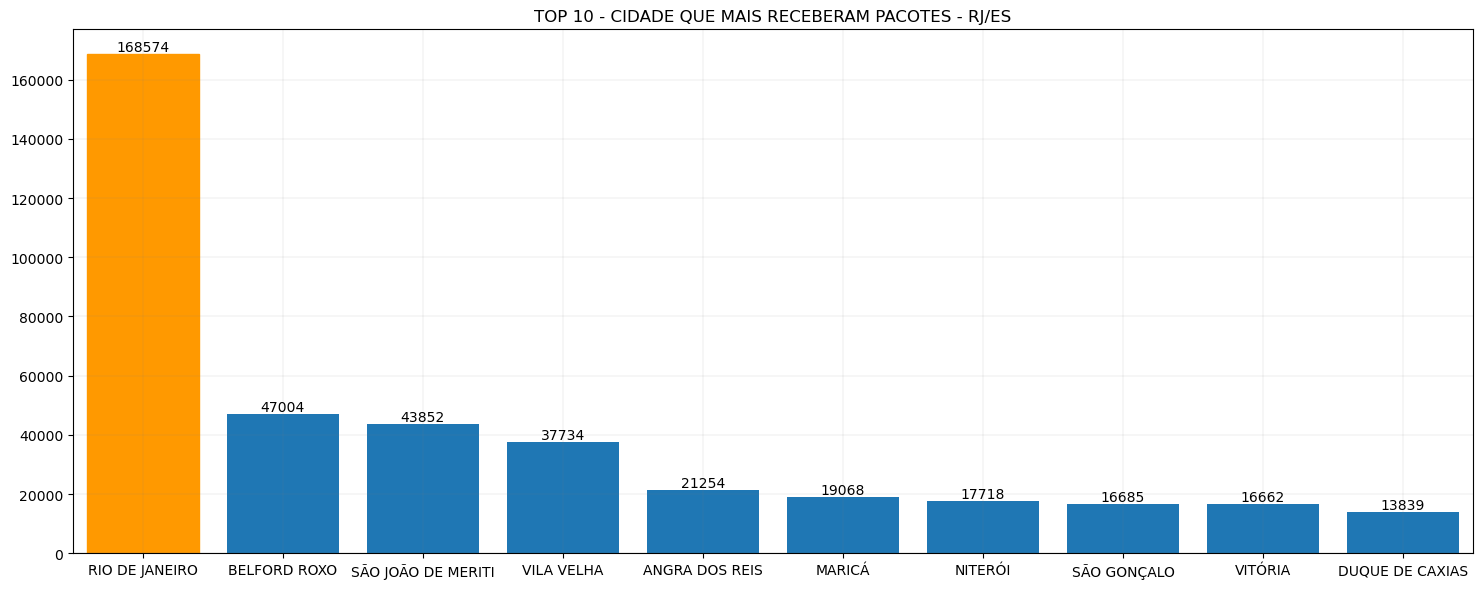

In [340]:
#Criando graficos

df_cidade = df_pacotes_entregues['CIDADE'].value_counts().head(10)
#Função pyplot.bar()

# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(15,6))

# plota o gráfico de barras
df_cidade.plot(kind='bar', legend=False)
plt.title('TOP 10 - CIDADE QUE MAIS RECEBERAM PACOTES - RJ/ES')
#plt.xlabel("quantidades de pacotes")
#plt.ylabel("Nome dos Hub's")

# Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0])

b2 = ax.bar(x = df_cidade.index, height = df_cidade)
            
b2[0].set_color("#ff9900")
# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Plotando as linhas de grade
ax.grid(True, linestyle='-', linewidth=0.1, color='grey')

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

#Salva o gráfico
plt.savefig("./gold/cidade_pacotes_05.svg")
#plt.savefig("base_pacotes.pdf")
plt.savefig("./gold/cidade_pacotes_05.png",dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

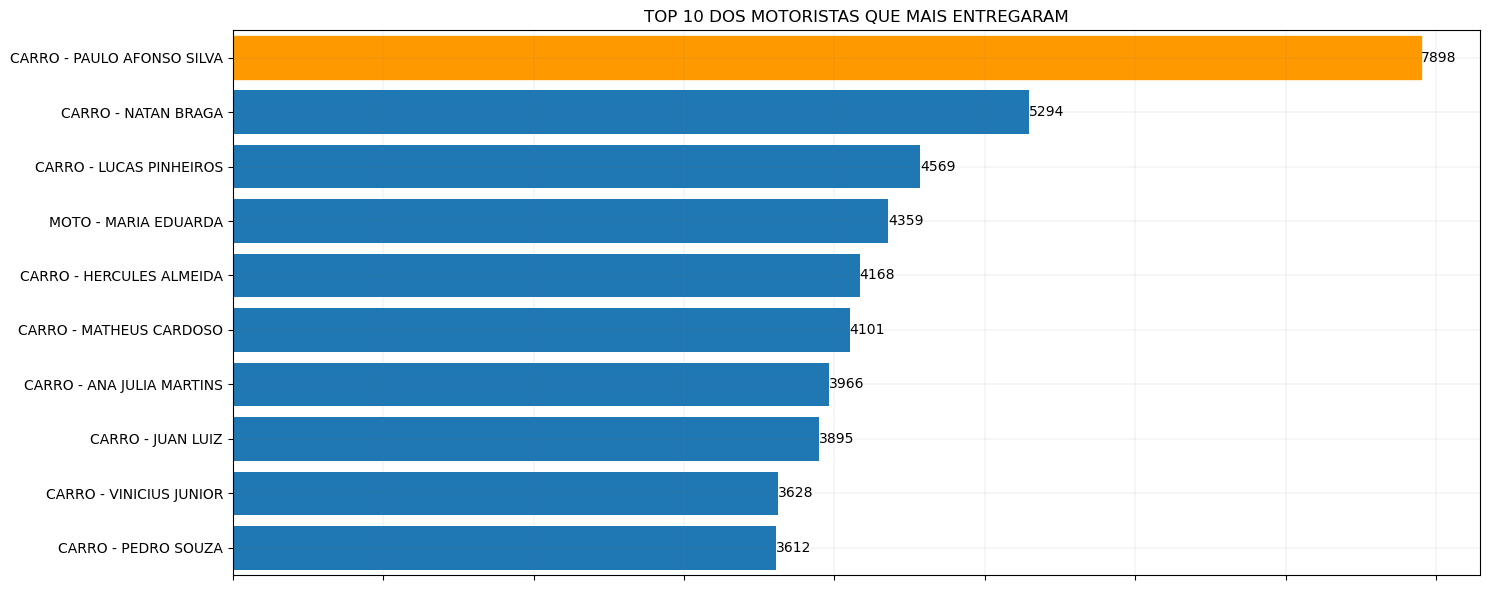

In [341]:


#Criando graficos

#Estou utilizando o .tail(10) para exibindo os 10 ultimos, assim não a necessidade de organizar de forma descrescente

df_motorista = df_pacotes_entregues['MOTORISTA'].value_counts().sort_values(ascending=True).tail(10)
#Função pyplot.bar()

# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(15,6))

# plota o gráfico de barras
df_motorista.plot(kind='barh', legend=False)
plt.title('TOP 10 DOS MOTORISTAS QUE MAIS ENTREGARAM')
#plt.xlabel("quantidades de pacotes")
#plt.ylabel("Nome dos Hub's")

# Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0])

#Mplotando e mapeando as barras do grafico
b2 = ax.barh(y=df_motorista.index, width = df_motorista)

#Colorido a primeira barra do grafico
b2[-1].set_color("#ff9900")

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.set_yticklabels(ax.get_yticklabels())

#Plotando as linhas de grade
ax.grid(True, linestyle='-', linewidth=0.1, color='grey')

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

#Salva o gráfico
plt.savefig("./gold/motoristas_top_10_06.svg")
#plt.savefig("base_pacotes.pdf")
plt.savefig("./gold/motoristas_top_10_06.png",dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

In [269]:
#Esse comando localizando o nome do veículo dentro da linha e salva na coluna TIPO_DE_VEICULO
#o nome nome referente.

df_pacotes_entregues.loc[df_pacotes_entregues['MOTORISTA'].str.contains('CARRO'),'TIPO_DE_VEICULO'] = 'CARRO'

df_pacotes_entregues.loc[df_pacotes_entregues['MOTORISTA'].str.contains('MOTO'),'TIPO_DE_VEICULO'] = 'MOTO'

df_pacotes_entregues.loc[df_pacotes_entregues['MOTORISTA'].str.contains('BIKE'),'TIPO_DE_VEICULO'] = 'BIKE'

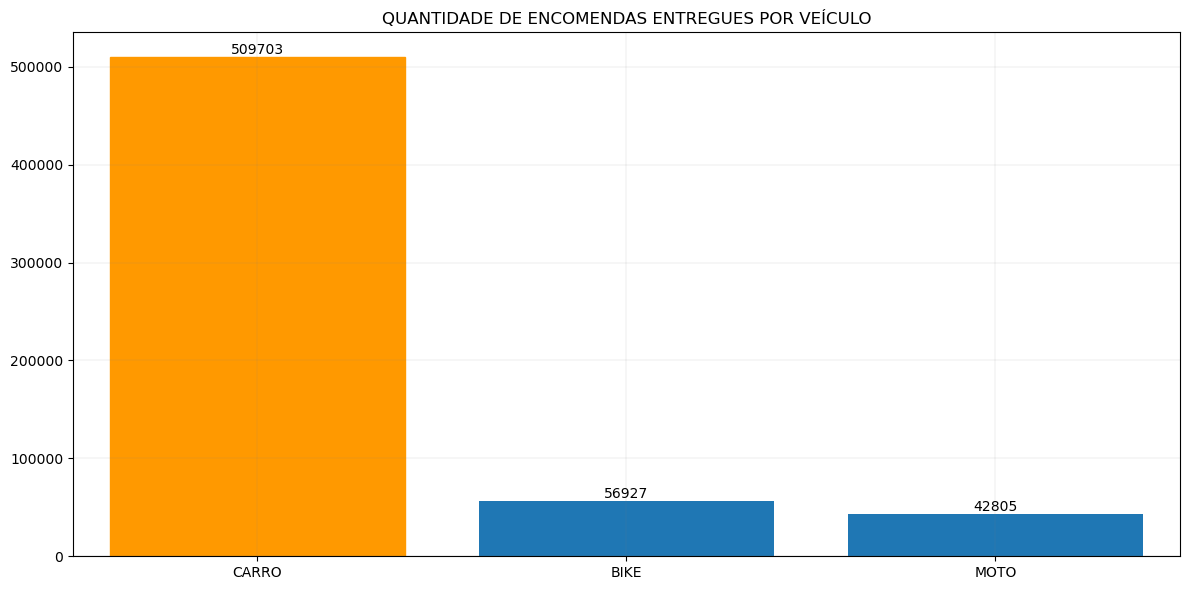

In [342]:
#plotando grafico 

df_tipo_veiculo = df_pacotes_entregues['TIPO_DE_VEICULO'].value_counts()

#Criando graficos

#Estou utilizando o .tail(10) para exibindo os 10 ultimos, assim não a necessidade de organizar de forma descrescente

#df_tipo_veiculo = df_pacotes_entregues['MOTORISTA'].value_counts().sort_values(ascending=True).tail(10)
#Função pyplot.bar()

# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(12,6))

# plota o gráfico de barras
df_tipo_veiculo.plot(kind='bar', legend=False)
plt.title('QUANTIDADE DE ENCOMENDAS ENTREGUES POR VEÍCULO')

#plt.xlabel("quantidades de pacotes")
#plt.ylabel("Nome dos Hub's")

# Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0])

b2 = ax.bar(df_tipo_veiculo.index, height = df_tipo_veiculo)

b2[0].set_color("#ff9900")

#b1[-1].set_color("#ff9900")
# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Plotando as linhas de grade
ax.grid(True, linestyle='-', linewidth=0.1, color='grey')

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

#Salva o gráfico
plt.savefig("./gold/endereco_pacotes.svg")
#plt.savefig("base_pacotes.pdf")
plt.savefig("./gold/base_pacaotes.png",dpi = 150, format = "png")

# Exibe o gráfico
plt.show()